In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')

In [2]:
d1 = pd.read_parquet("E:\Learning\TEAI Cup\Data\Parquet Data\d1_1_general_filtering.parquet")
d2 = pd.read_parquet("E:\Learning\TEAI Cup\Data\Parquet Data\d2_1_general_cleaning.parquet")

In [3]:
def average_of_value(x):
    nums = list(map(float, x.split(",")))
    return np.mean(nums)


In [13]:
sample = d1.sample()
machine_id = sample.machine_id.values[0]
start_time = pd.to_datetime(sample.machine_event_start_timestamp.values[0])
end_time = pd.to_datetime(sample.machine_event_start_end_timestamp.values[0])
part_number = sample.part_number.values[0]
tool_number = sample.tool_number.values[0]

print(
    f"Machine ID: {machine_id} \nStart Time: {start_time} \nEnd Time: {end_time} \nPart Number: {part_number} \nTool Number: {tool_number}"
)


Machine ID: S-226 
Start Time: 2025-12-05 09:19:39 
End Time: 2025-12-05 09:38:36 
Part Number: 5-965906-1 
Tool Number: S0025195


In [14]:
small_data = d2[
    (d2.timestamp >= start_time)
    & (d2.timestamp <= end_time)
    & (d2.machine_id == machine_id)
]
small_data["average_value"] = small_data["value"].apply(average_of_value)
small_data


,machine_id,variable_name,value,timestamp,lowerLimit,upperLimit,nominalValue,average_value
2126338,S-226,prfungTeil1KastenSpk,"1.884,1.8772,1.8876,1.8833,1.8819,1.8833,1.885...",2025-12-05 09:19:42,0.000,0.350,1.60,1.883805
2126337,S-226,iTeil1Rastfederdifferenz,"0.0064,0.0223,0.0038,0.0001,0.0079,0.0034,0.01...",2025-12-05 09:19:42,-0.080,0.080,0.00,0.007186
2126324,S-226,teil1Wire,"1.9432,1.9413,1.9392,1.953,1.9456,1.9403,1.939...",2025-12-05 09:19:42,-0.200,0.200,2.00,1.941846
2126330,S-226,teil2Wire,"1.9539,1.9595,1.9345,1.9459,1.9569,1.9444,1.95...",2025-12-05 09:19:42,-0.200,0.200,2.00,1.956741
2126327,S-226,iTeil2KastenVorne,"1.8051,1.8094,1.8029,1.8197,1.7859,1.8361,1.81...",2025-12-05 09:19:42,0.000,0.150,1.75,1.824409
...,...,...,...,...,...,...,...,...
2135817,S-226,teil1Iso,"3.46,3.452,3.4512,3.4763,3.4509,3.4582,3.4541,...",2025-12-05 09:35:56,-0.200,0.200,3.50,3.462283
2135816,S-226,teil1Wire,"1.9457,1.9365,1.937,1.9404,1.9356,1.9366,1.940...",2025-12-05 09:35:56,-0.200,0.200,2.00,1.938218
2135827,S-226,teil1GapX,"0.497,0.5073,0.5067,0.515,0.5056,0.5045,0.5014...",2025-12-05 09:35:56,-0.060,0.000,0.53,0.505495
2135815,S-226,iTeil1Crimp,"1.8159,1.8143,1.8155,1.8188,1.8152,1.8171,1.81...",2025-12-05 09:35:56,0.000,0.120,1.75,1.814673


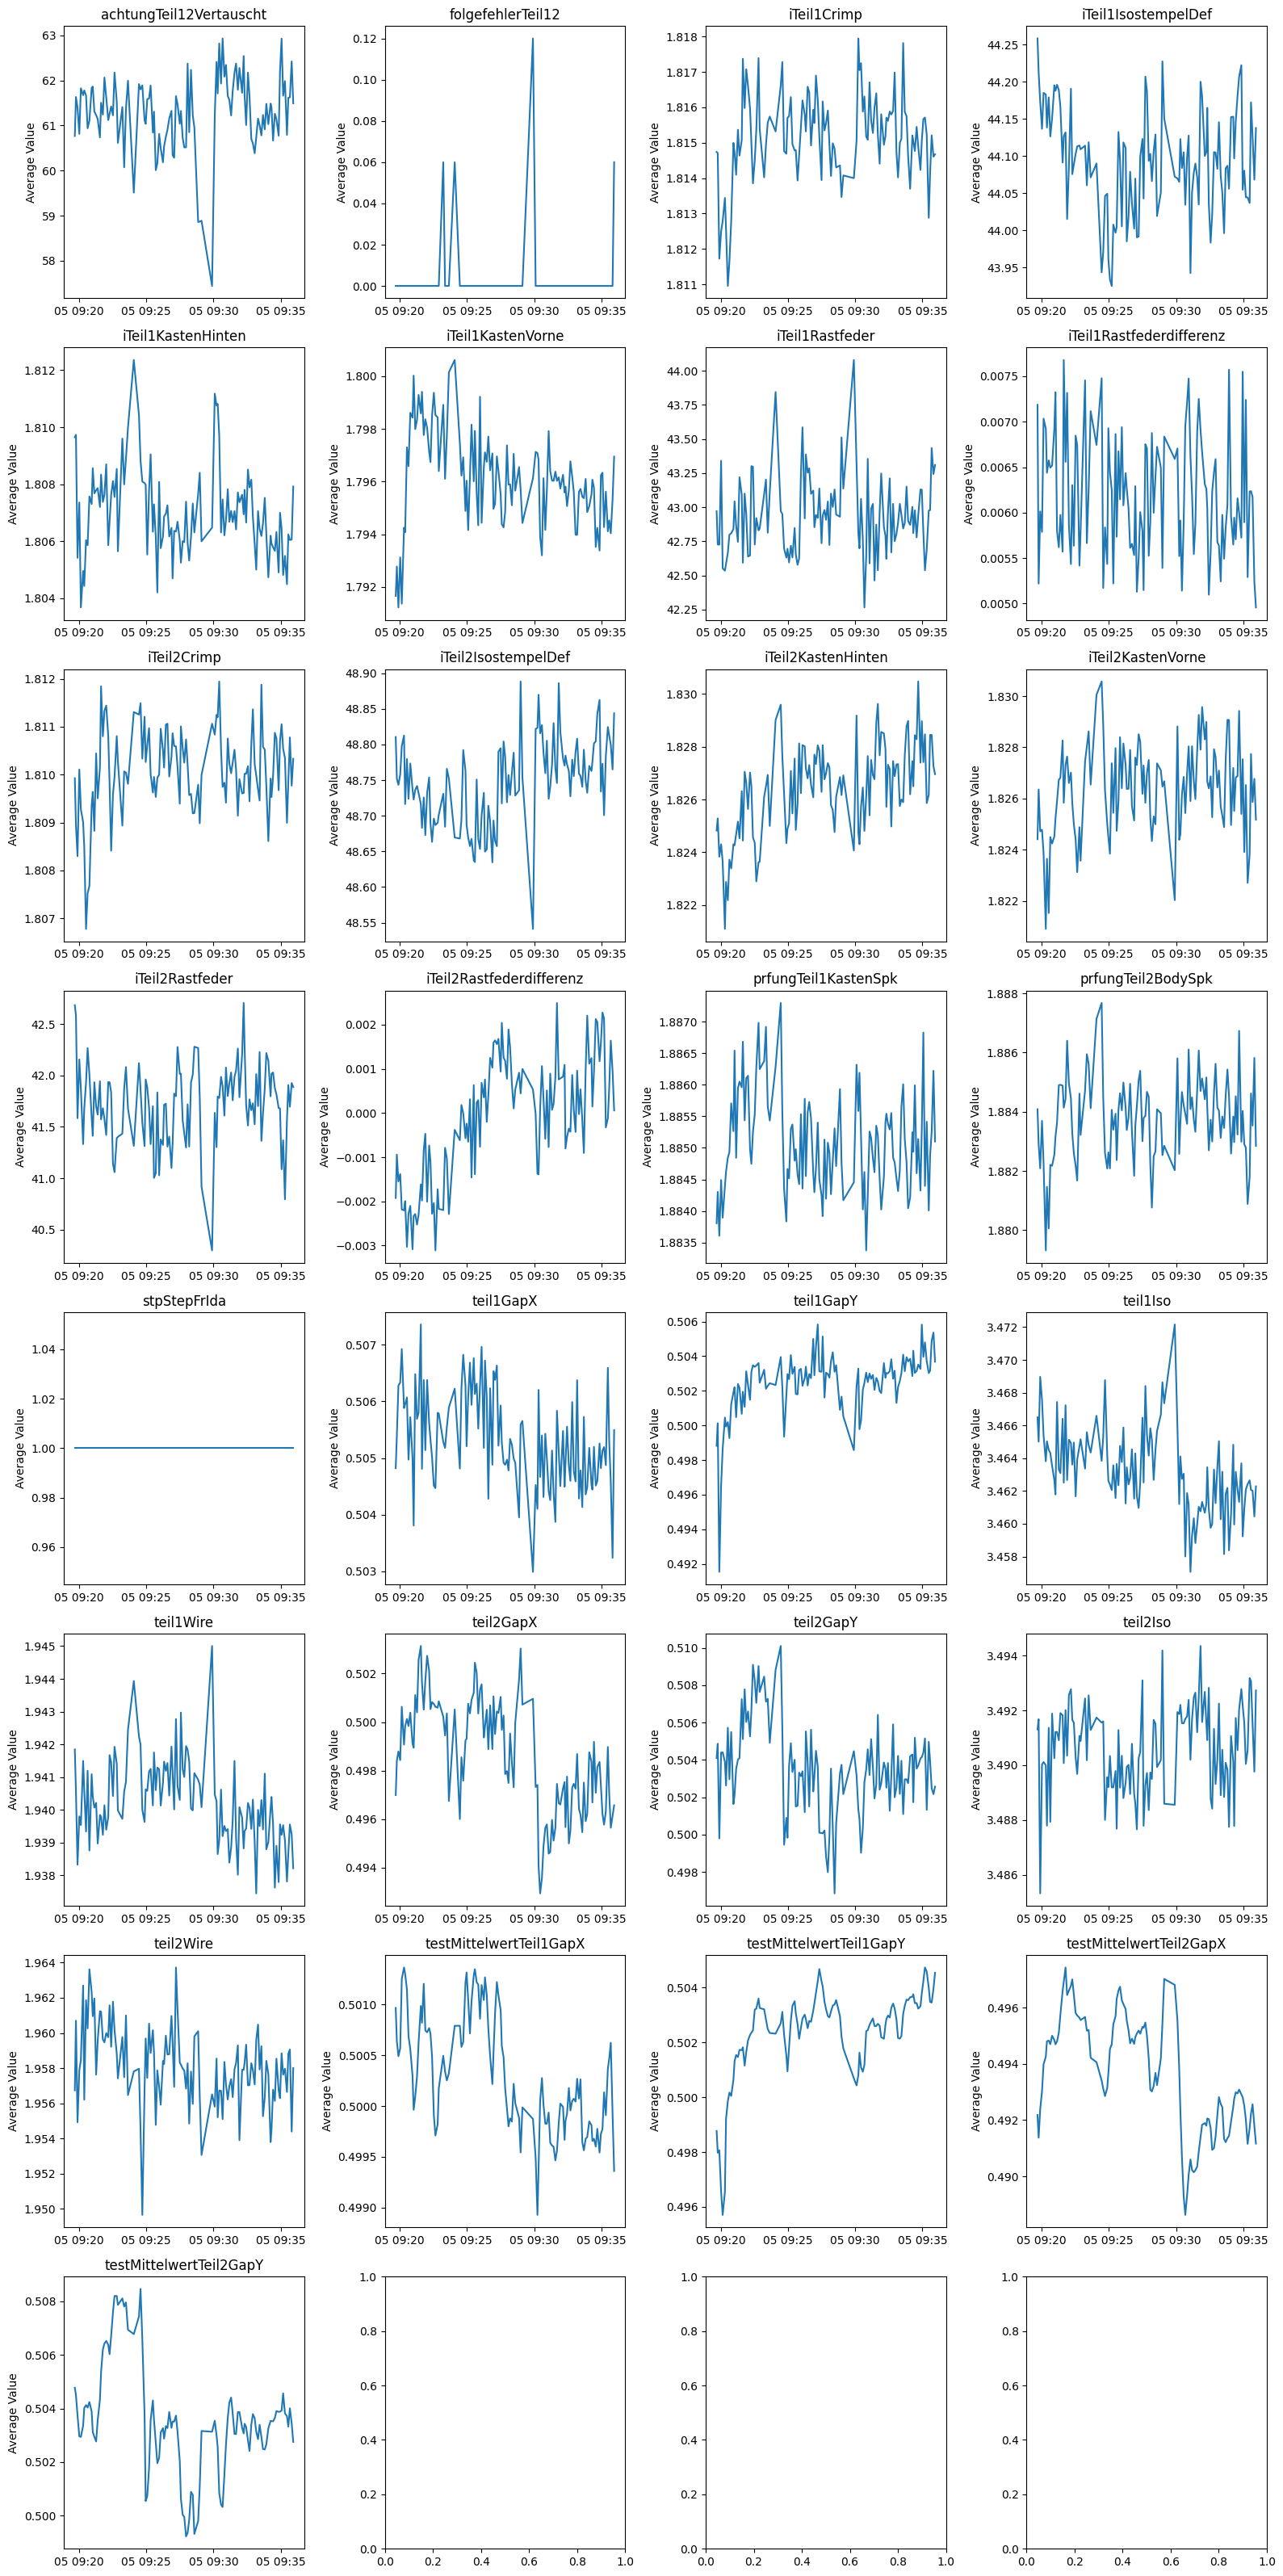

In [15]:
# Without Upper Limit and Lower Limit on the graphs
# Total Variables
total_vars = sorted(small_data.variable_name.unique().tolist())

n = len(total_vars)
cols = 4
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
axes = axes.flatten()

for i, var in enumerate(total_vars):
    temp = small_data[small_data["variable_name"] == var]
    axes[i].plot(temp["timestamp"], temp["average_value"])
    axes[i].set_title(var)
    axes[i].set_ylabel("Average Value")


plt.tight_layout()
plt.show()


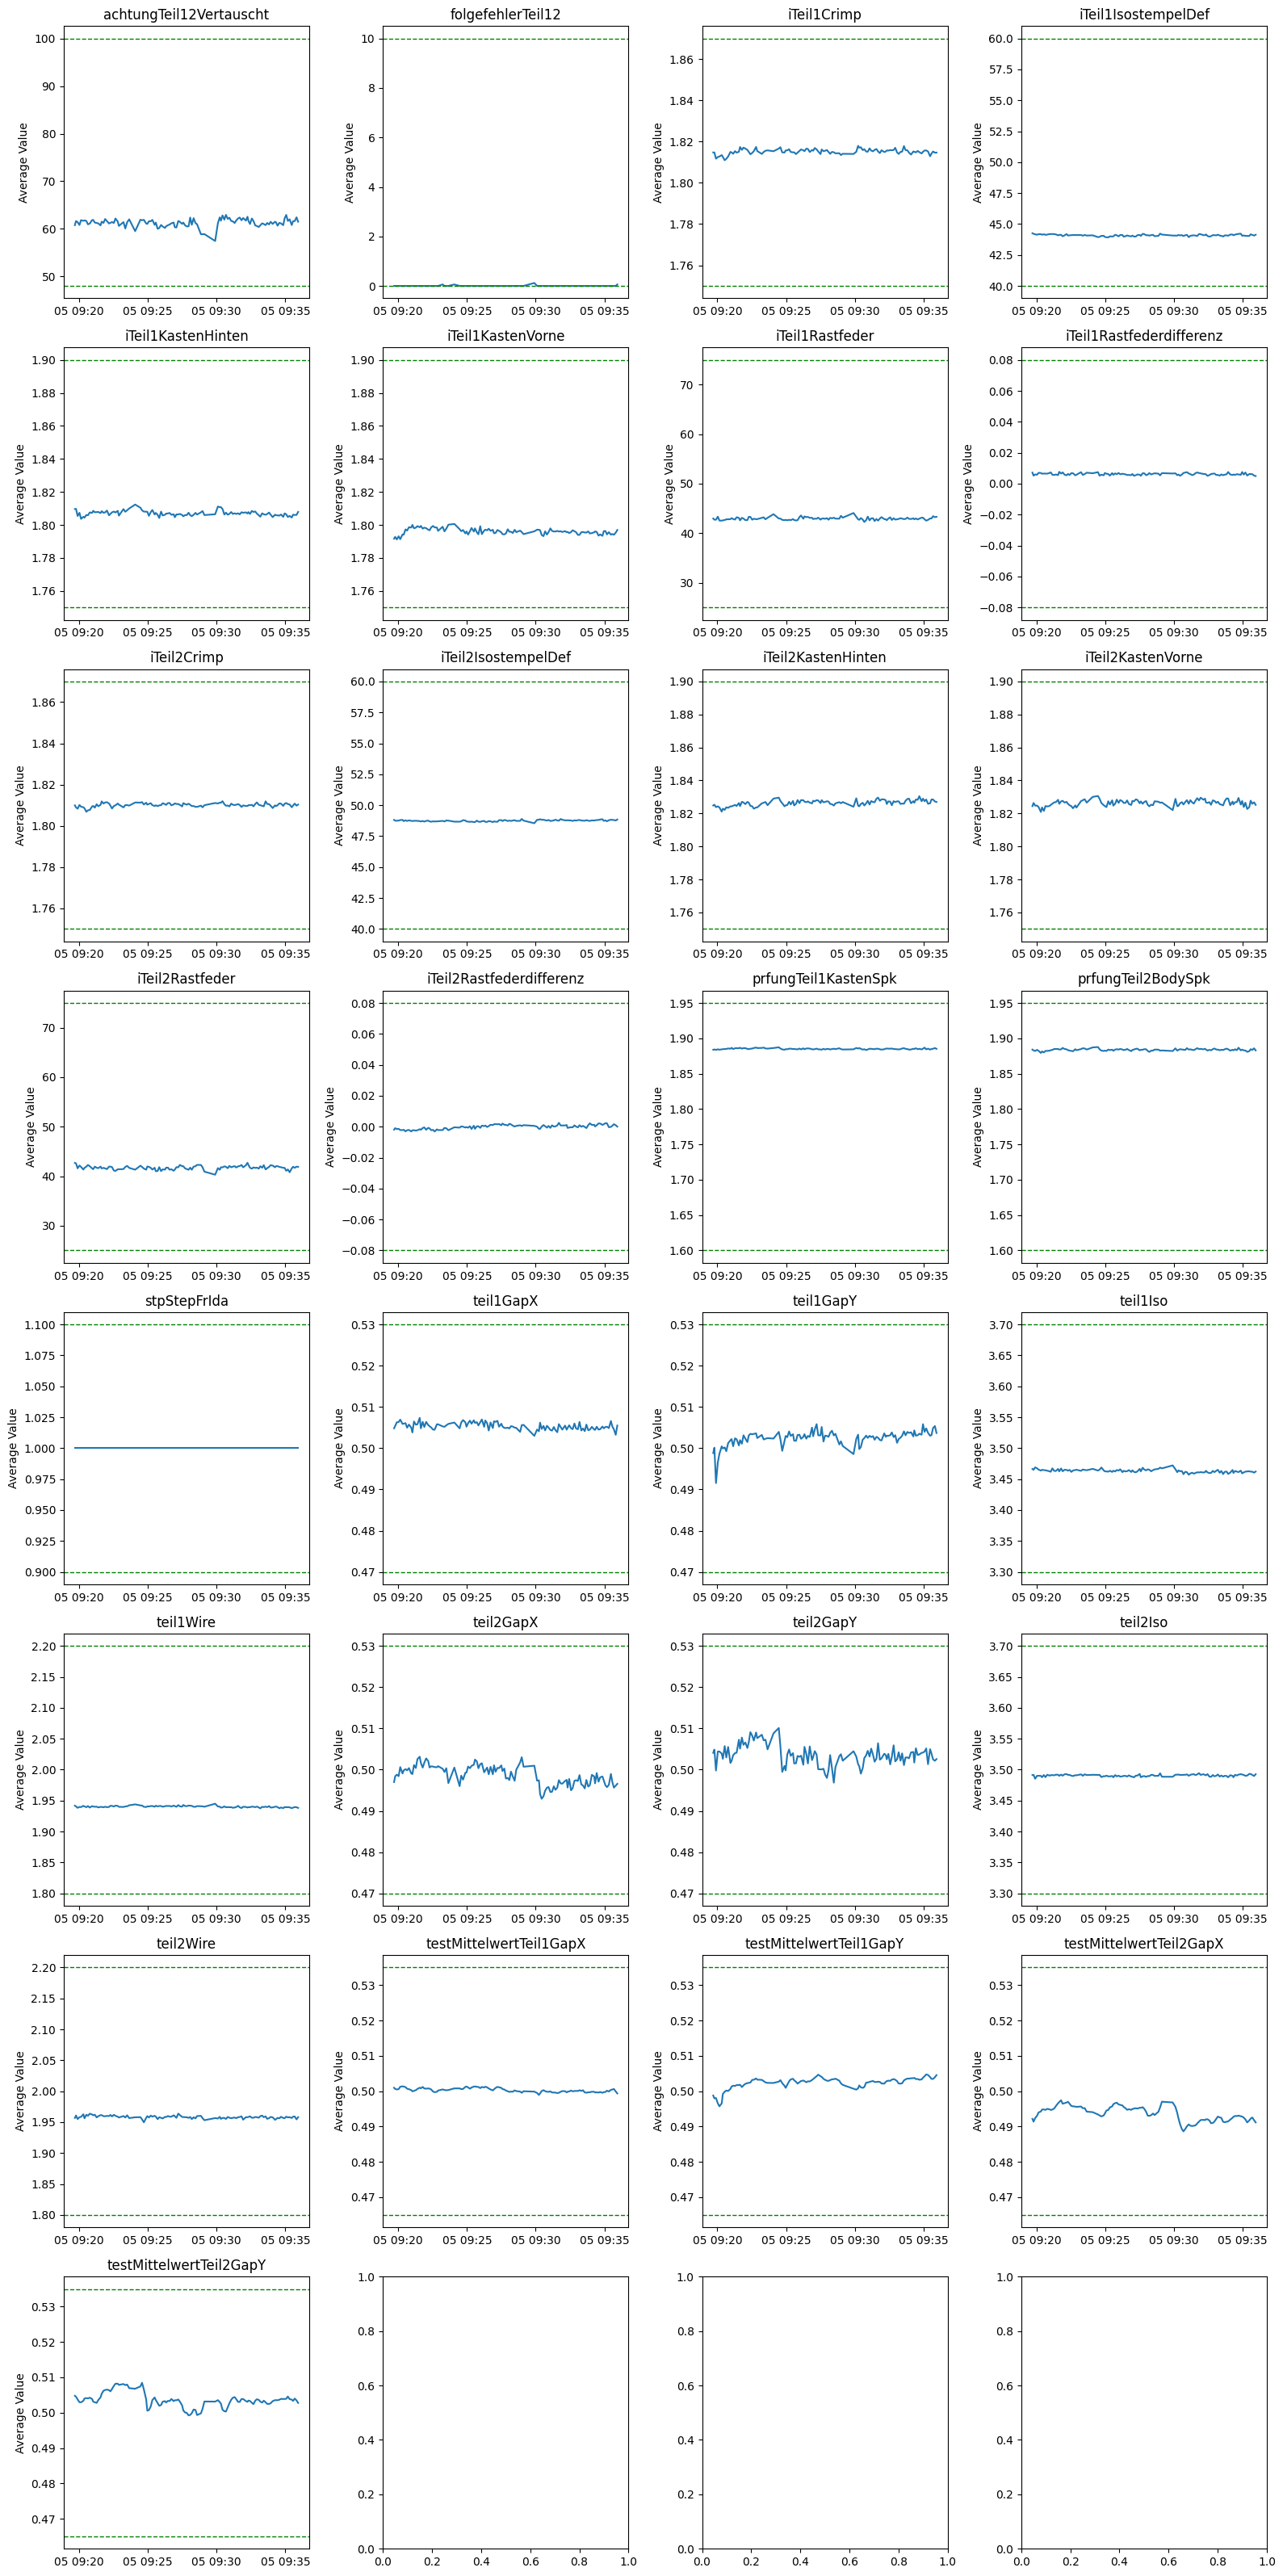

In [16]:
# Plots with upper and Lower Limits

# Total Variables
total_vars = sorted(small_data.variable_name.unique().tolist())

n = len(total_vars)
cols = 4
rows = math.ceil(n / cols)
fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
axes = axes.flatten()

for i, var in enumerate(total_vars):
    temp = small_data[small_data["variable_name"] == var]
    axes[i].plot(temp["timestamp"], temp["average_value"])
    axes[i].set_title(var)
    axes[i].set_ylabel("Average Value")
    lowerLimit = temp.lowerLimit.values[0]
    upperLimit = temp.upperLimit.values[0]
    nominalValue = temp.nominalValue.values[0]
    axes[i].axhline(
        y=lowerLimit + nominalValue, color="green", linestyle="--", linewidth=1
    )
    axes[i].axhline(
        y=upperLimit + nominalValue, color="green", linestyle="--", linewidth=1
    )

plt.tight_layout()
plt.show()
